### Exploratory Data Analysis on the Titanic data set

In [44]:
%pip install -r req.txt
%pip install missingno

import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data preparation
1. Data observation


In [45]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

2. Data cleaning and preprocessing

In [48]:
# Drop inrelevant information
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [49]:
# Filling in missing data  : Age
# Use mean() will cause biased data for later analysis
# Using random choices from existing ages instead

import numpy as np

known_age = df["Age"].dropna()
size = df["Age"].isnull().sum()

random_ages = np.random.choice(known_age, size=size, replace=True)

df.loc[df["Age"].isnull(), "Age"] = random_ages

df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [50]:
# Filling in missing data  : Embarked

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [51]:
%pip install imbalanced-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Min-max scaling (Normalization)
min_max_scaler = MinMaxScaler()
min_max_scaled_features = min_max_scaler.fit_transform(df[["Age","Fare"]])

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


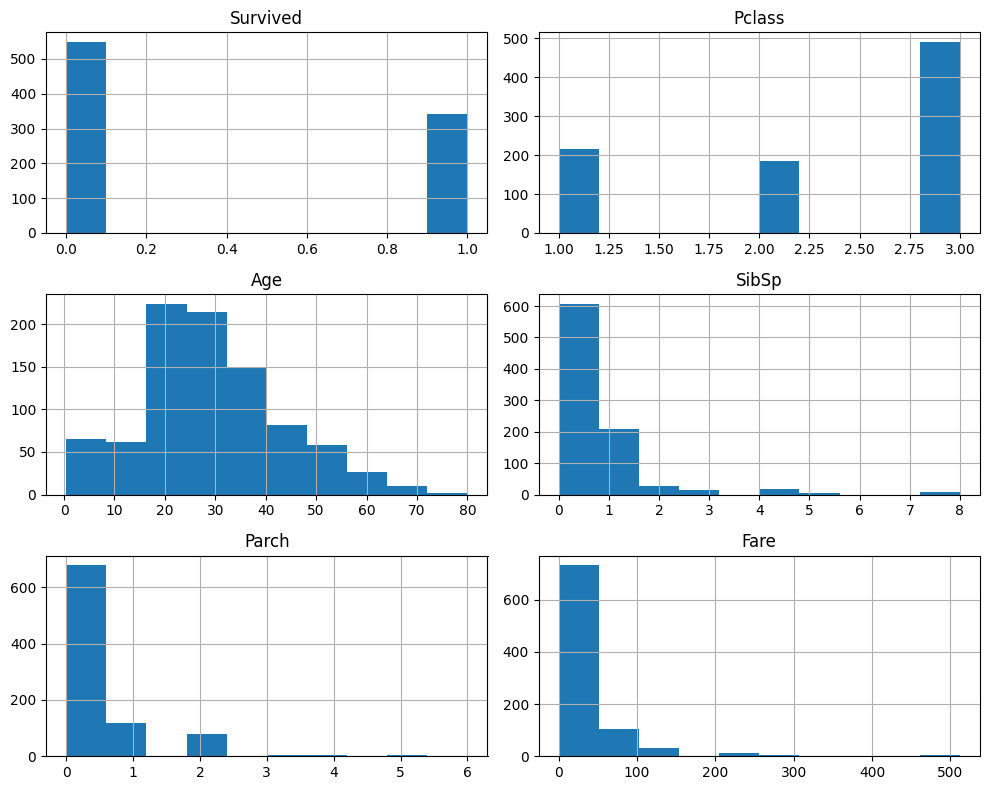

In [52]:
# sibsp: of siblings / spouses aboard the Titanic
# parch	: of parents / children aboard the Titanic
# embarked	: Port of Embarkation
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [53]:
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(
    df[["Survived", "Sex", "Embarked", "Pclass"]]
)
onehot_encoded = onehot_encoded.toarray()
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out())
onehot_df.head()

# Add species column with encoded species
df = pd.concat([df, onehot_df], axis=1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Survived_0', 'Survived_1', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [68]:
# Visualize interaction features - SEX and Survival
interaction_features1 = df[["Survived", "SibSp",'Parch','Fare','Pclass']]
interaction_features2 = df[
    ["Survived_0", "Survived_1", "Embarked_C", "Embarked_Q", "Embarked_S"]
]

    sns.heatmap(interaction_features.corr(), annot=True, cmap="coolwarm", center=0, ax=axes["interaction_features1","interaction_features1"])
    axes[i].set_title(title)

# Adjust layout
plt.tight_layout()
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)